# Development | Analyse jobs

Look for: 
- replication
- precedence
- durations

In [275]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [276]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyter_black

jupyter_black.load()

# Project
from src.data_connectors import read_input_files
from src.data_preparation import search_space

In [277]:
instance = 299
instances_path = "../data/input/HRTInstances"
ins_x = read_input_files.read_file(os.path.join(instances_path, f"Instance_{instance}.txt"))

In [278]:
ins_x.df_setup

,Humans,Robots,WorkingSpaces
0,2,3,3


In [279]:
# Wotking spaces and tasks
print(f"Working spaces: {ins_x.df_workingspace_id.WorkingSpace.unique()}")
print(f"How many tasks: {ins_x.df_workingspace_id.Id.nunique()}")
print(f"Tasks: {ins_x.df_workingspace_id.Id.unique()}")
print(
    f"How many tasks per working space: {ins_x.df_workingspace_id.groupby('WorkingSpace')['Id'].count()}"
)

Working spaces: [1 2 3]
How many tasks: 150
Tasks: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
How many tasks per working space: WorkingSpace
1    50
2    50
3    50
Name: Id, dtype: int64


In [280]:
# Precedence
first_tasks_x = search_space.find_tasks_without_predecessor(ins_x.df_predecessor_sucessor)
print(f"How many jobs: {len(first_tasks_x)}")
print(f"First tasks ID of each job: {', '.join([str(x) for x in first_tasks_x])}")

# matching replicas
df_map_jobs = search_space.find_main_jobs(ins_x.df_predecessor_sucessor, ins_x.df_workingspace_id)
print(f"How many different main jobs? {df_map_jobs.MainJob.nunique()}")

How many jobs: 3
First tasks ID of each job: 1, 51, 101
How many different main jobs? 3


In [281]:
df_map_jobs.head()

,WorkingSpace,Id,MainJob
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0


In [282]:
ins_x.df_resource_job_time.head()

,Resource,Job,Time
0,0,1,81
1,1,1,81
2,0,2,46
3,1,2,46
4,2,2,176


In [283]:
def add_main_job_id(df_map_jobs: pd.DataFrame, df_resource_job_time: pd.DataFrame) -> pd.DataFrame:
    df = df_resource_job_time.merge(
        df_map_jobs[["Id", "MainJob"]], how="left", left_on="Job", right_on="Id"
    )
    df.drop(["Id"], axis=1, inplace=True)
    return df

In [284]:
# Are the replicas similar?
df_w_job = add_main_job_id(df_map_jobs, ins_x.df_resource_job_time)

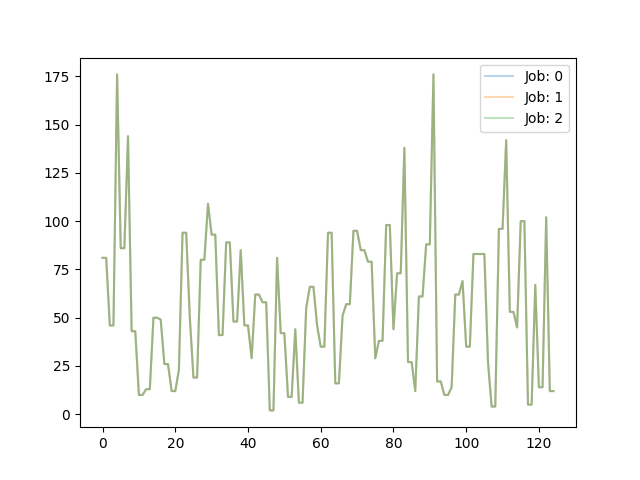

In [285]:
plt.figure()
job_ids = df_w_job.MainJob.unique()
for job in job_ids:
    df_w_job_x = df_w_job[df_w_job.MainJob == job].reset_index(drop=True)
    df_w_job_x.Time.plot(label=f"Job: {job}", alpha=0.3)
plt.legend()
plt.show()

# Have everything in the same place

In [286]:
df_times_predecessors = search_space.get_all_times_in_different_columns_per_task(ins_x)

In [287]:
df_times_predecessors.head()

,MainJob,Job,0,1,2,3,4,T:0-2,T:0-3,T:0-4,T:1-2,T:1-3,T:1-4,Predecessors
0,0,1,81.0,81.0,NaN,NaN,NaN,66.0,NaN,NaN,66.0,NaN,NaN,[]
1,0,2,46.0,46.0,176.0,NaN,NaN,37.0,NaN,NaN,37.0,NaN,NaN,[1]
2,0,3,86.0,86.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1]
3,0,4,43.0,43.0,NaN,NaN,NaN,35.0,NaN,NaN,35.0,NaN,NaN,[1]
4,0,5,10.0,10.0,NaN,NaN,NaN,8.0,NaN,NaN,8.0,NaN,NaN,[1]
